## Import Modul

In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

## Read Data

In [80]:
df = pd.read_csv('data.csv')
df.tail(5)

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950
17612,2021-08-18,NUSA TENGGARA TIMUR,527,8,949,-430,54806,46222,1064,7520


In [81]:
target_column = 'Province'
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df[target_column]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [82]:
train_set
test_set.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
13406,2021-03-31,SULAWESI BARAT,1,1,3,-3,5365,5119,113,133
7655,2021-01-11,SUMATERA UTARA,95,3,89,3,19122,16336,700,2086
11693,2020-10-23,SULAWESI TENGAH,12,1,18,-7,787,512,31,244
1981,2021-01-23,JAWA TENGAH,1873,8,479,1386,114339,73396,4803,36140
9330,2021-05-16,KEPULAUAN RIAU,222,12,242,-32,13421,11232,298,1891


## Preprocessing Data

In [83]:
# cek missing value pada variabel train_set
train_set.isna().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

In [84]:
#cek missing value pada variabel tes_set
test_set.isna().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

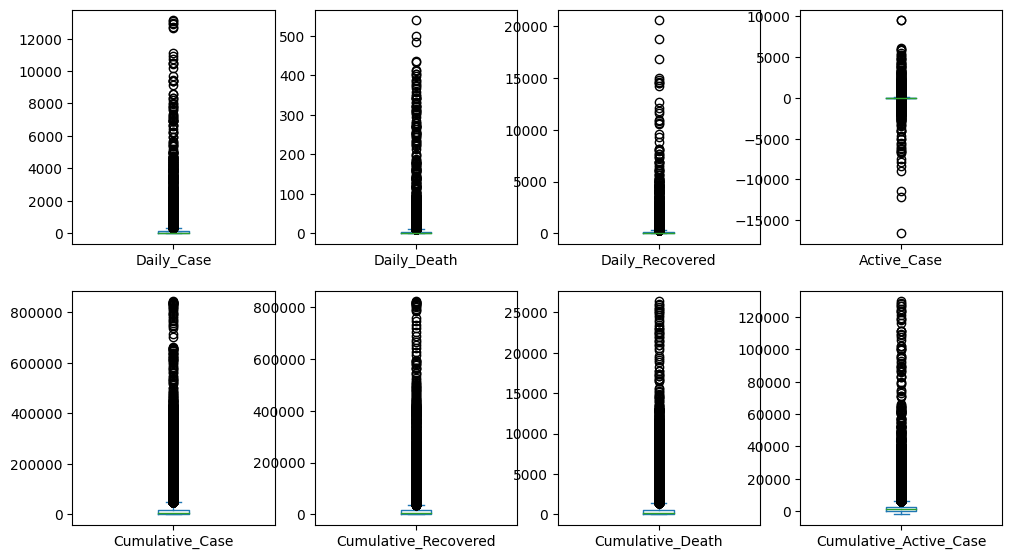

In [85]:
# Cek outlier pada variabel train_set
train_set.plot(subplots = True, layout= (4,4), kind='box', figsize =(12,14));

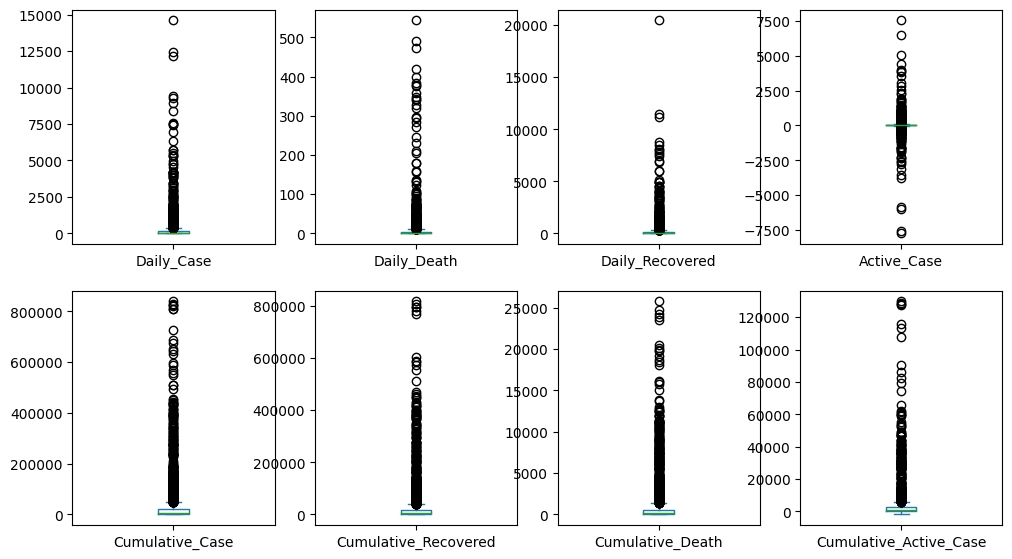

In [86]:
# Cek outlier pada variabel test_set
test_set.plot(subplots = True, layout= (4,4), kind='box', figsize =(12,14));#

### padahasil cek outlier diatas ditemukan pada kedua variabel memiliki outlier pada kolom Active case

In [87]:
# Perbaikan pada kedua variabel dengan menghapus nilai yang dibawah nol
train_set['Active_Case'] = np.where(train_set['Active_Case'] < 0,0, train_set['Active_Case'])
test_set['Active_Case'] = np.where(test_set['Active_Case'] < 0,0, test_set['Active_Case'])

In [88]:
#cek tipe data
print(train_set.info());
print(test_set.info());

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14090 entries, 1746 to 5201
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    14090 non-null  object
 1   Province                14090 non-null  object
 2   Daily_Case              14090 non-null  int64 
 3   Daily_Death             14090 non-null  int64 
 4   Daily_Recovered         14090 non-null  int64 
 5   Active_Case             14090 non-null  int64 
 6   Cumulative_Case         14090 non-null  int64 
 7   Cumulative_Recovered    14090 non-null  int64 
 8   Cumulative_Death        14090 non-null  int64 
 9   Cumulative_Active_Case  14090 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3523 entries, 13406 to 1146
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  --

In [89]:
#mengubah tipe data kolom Date dari objek menjadi Date and Time
train_set['Date']= pd.to_datetime(train_set['Date'])
test_set['Date']= pd.to_datetime(test_set['Date'])

### Data Exploration


In [116]:
numeric_cols = train_set.select_dtypes(include=['float64', 'int64']).columns
summary_stats = train_set[numeric_cols].describe()


print(summary_stats)

         Daily_Case   Daily_Death  Daily_Recovered   Active_Case  \
count  14090.000000  14090.000000     14090.000000  14090.000000   
mean     220.661959      6.814265       195.291341     65.385380   
std      714.068622     26.269225       733.659843    301.316182   
min        0.000000      0.000000         0.000000      0.000000   
25%        7.000000      0.000000         3.000000      0.000000   
50%       41.000000      1.000000        27.000000      2.000000   
75%      141.000000      4.000000       119.000000     32.000000   
max    13133.000000    539.000000     20602.000000   9540.000000   

       Cumulative_Case  Cumulative_Recovered  Cumulative_Death  \
count     14090.000000          14090.000000      14090.000000   
mean      27273.772037          23270.463946        786.432292   
std       73627.319123          65473.001687       2117.709404   
min           1.000000              0.000000          0.000000   
25%         856.000000            437.500000         25.0

### Data Visualisasi

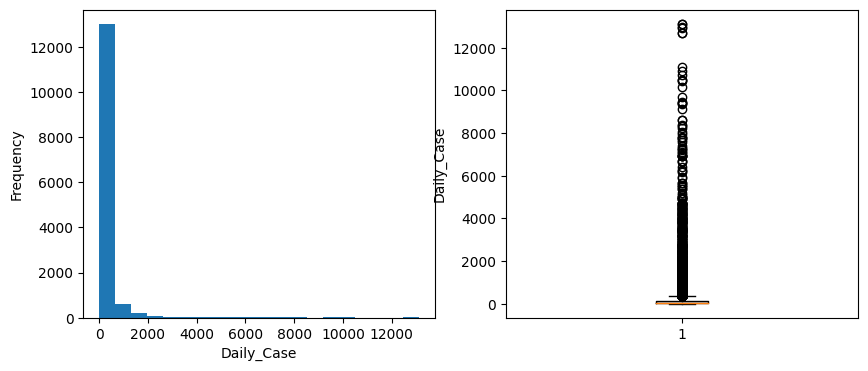

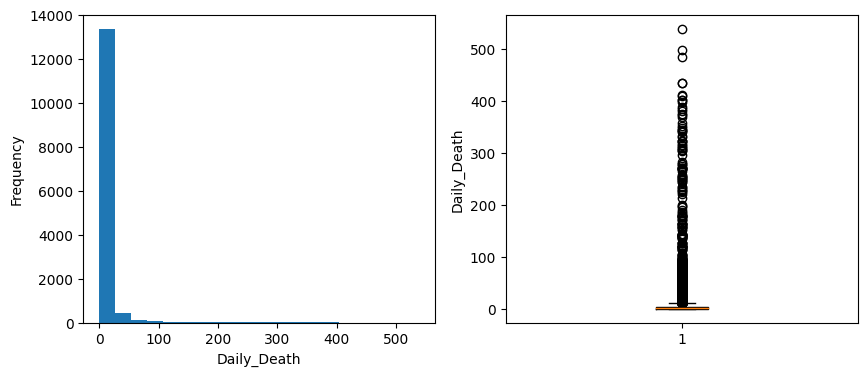

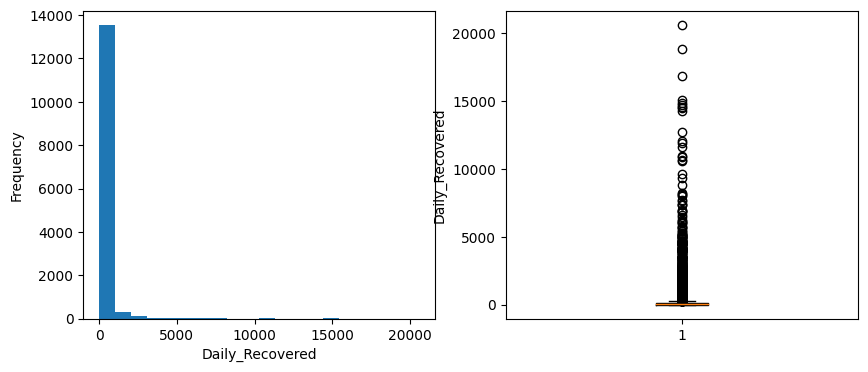

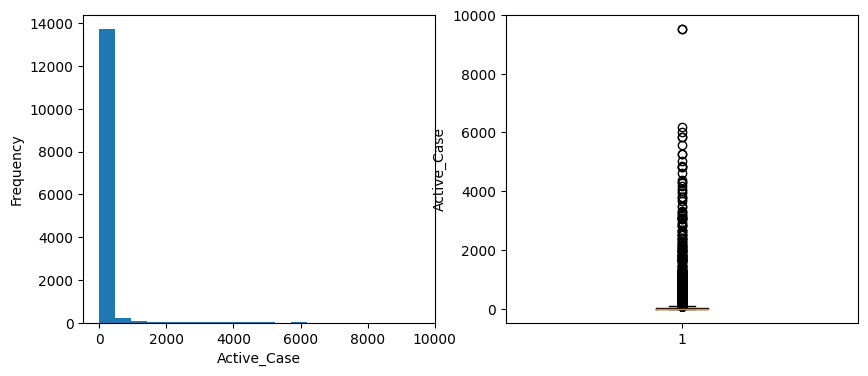

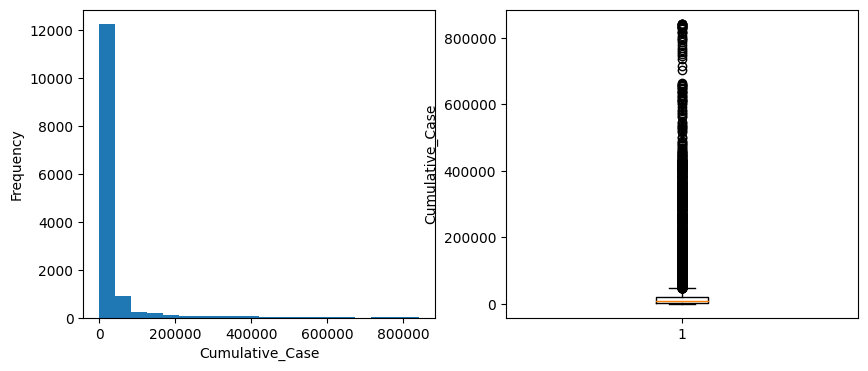

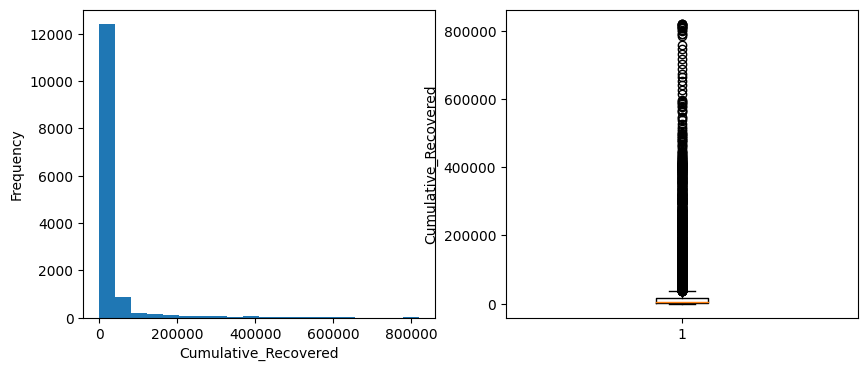

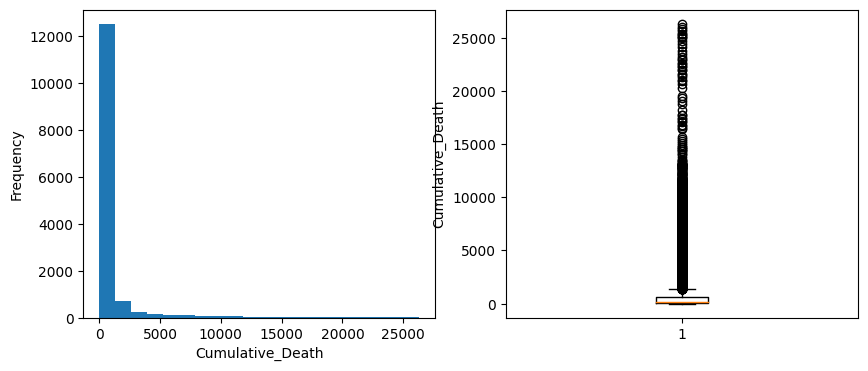

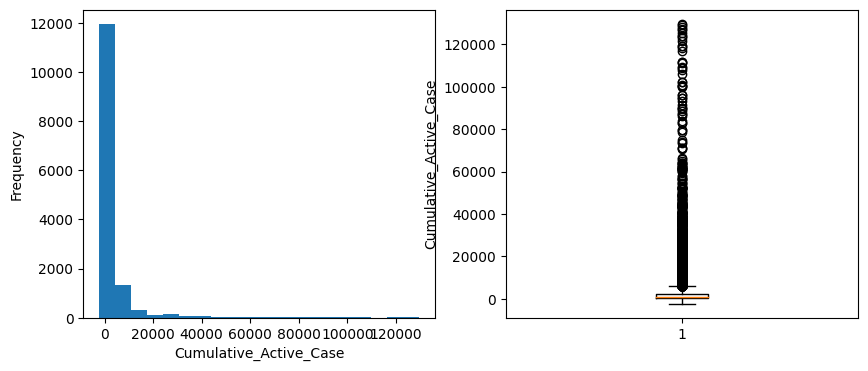

In [117]:
# membuat histogram dan boxplot untuk setiap variabel numerik pada dataset
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].hist(train_set[col], bins=20)
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')
    ax[1].boxplot(train_set[col])
    ax[1].set_ylabel(col)
    plt.show()

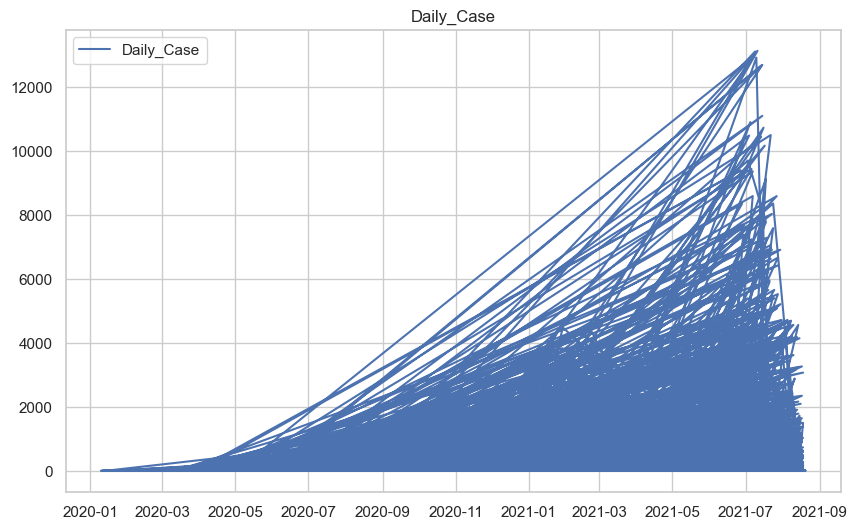

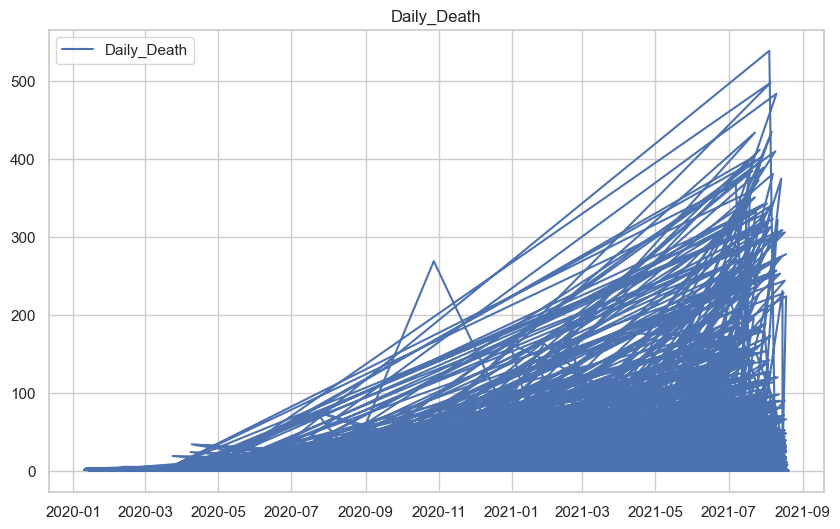

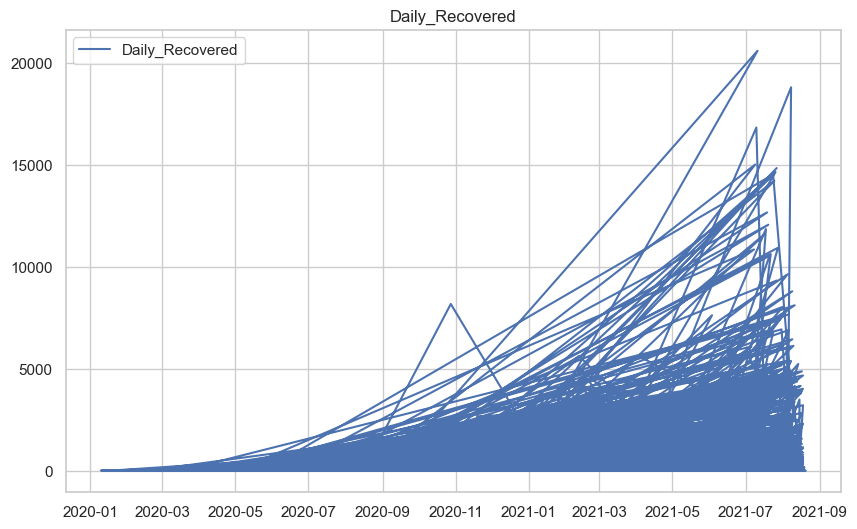

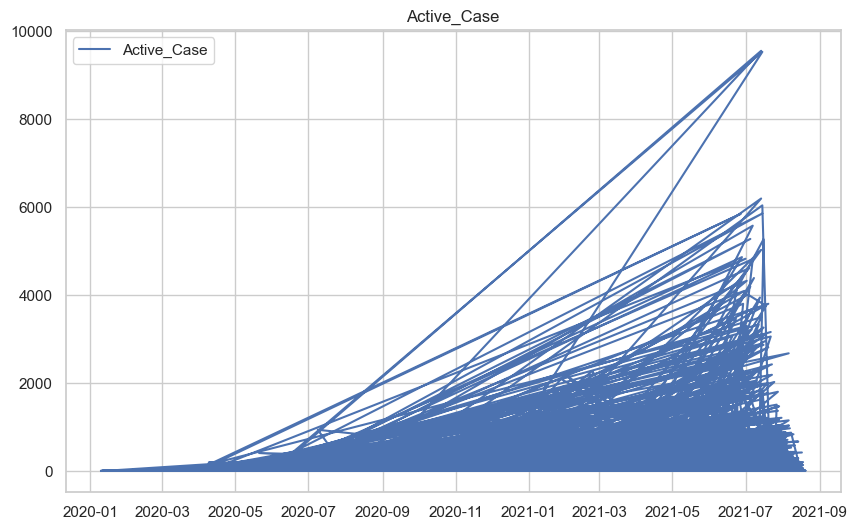

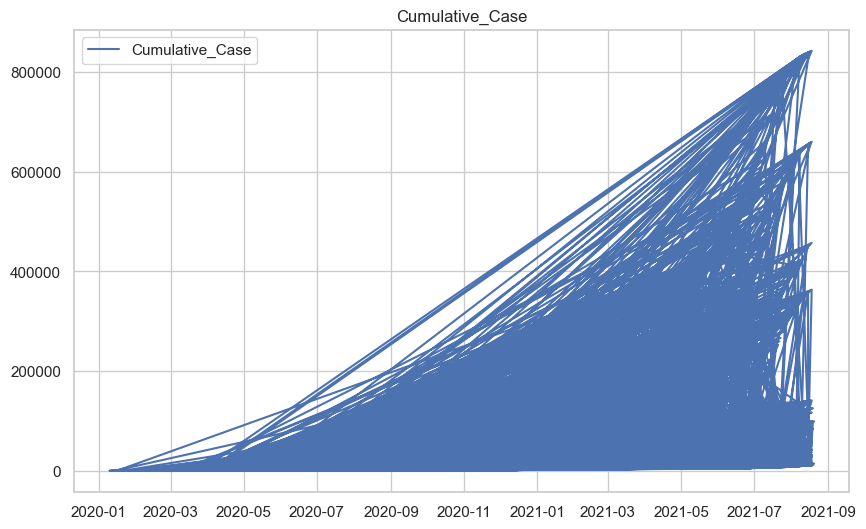

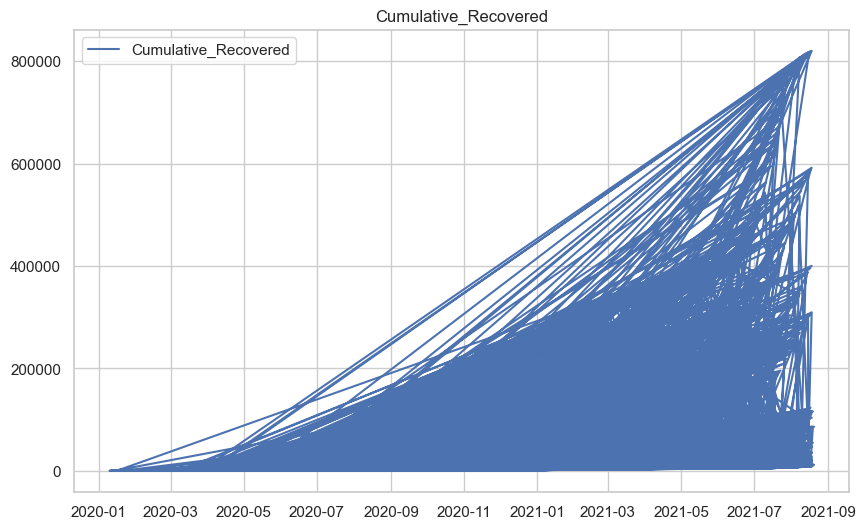

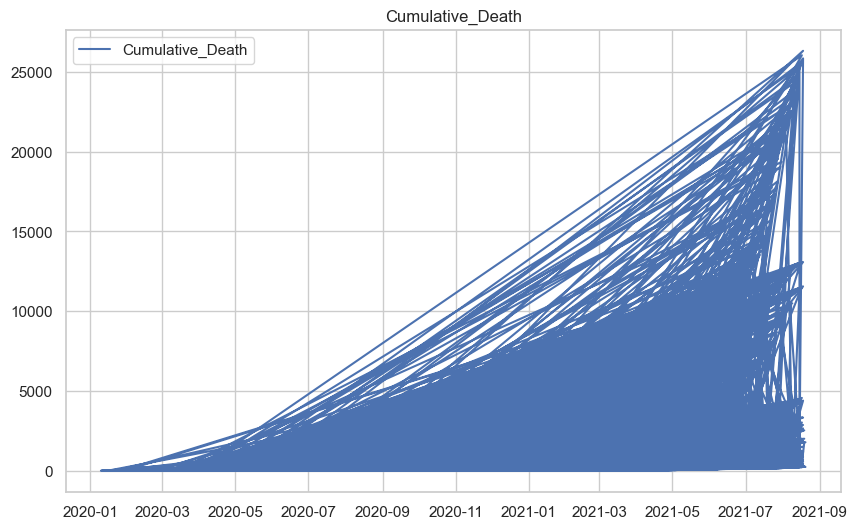

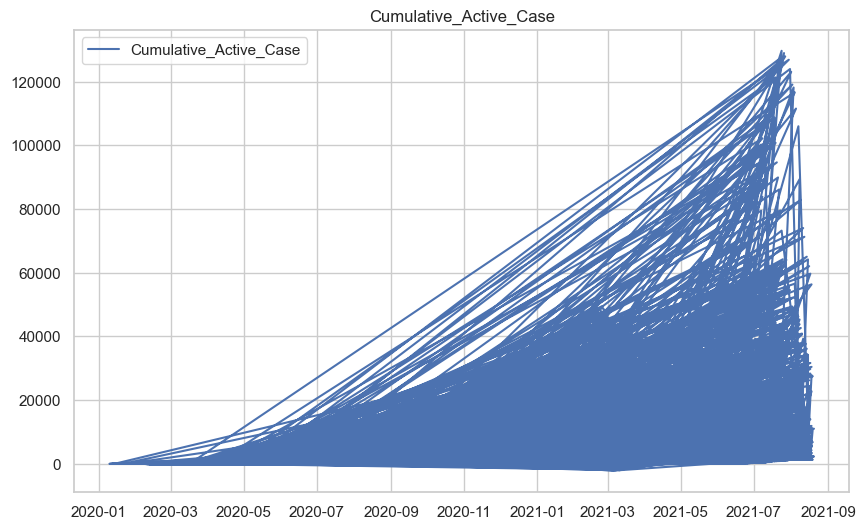

In [124]:
# Line chart
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    plt.plot(train_set[col], label=col)
    plt.title(col)
    plt.legend()
    plt.show()

C:\Users\deo pandia\AppData\Local\Temp\ipykernel_8420\1297842868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


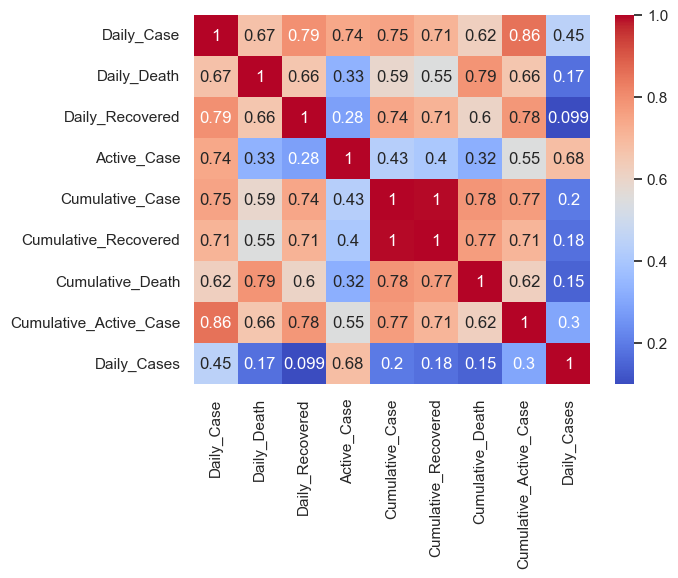

In [128]:
# kalkulasi untuk mengetahui korelasi
corr_matrix = train_set.corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');